In [158]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np

### 读取 
`/home/lih/BagPy/bags/demo_all_migration_2023-11-29-10-52-12.bag `

In [159]:
bag = bagreader("/home/lih/BagPy/bags/demo_1_migration_2023-12-04-21-20-24.bag")

[INFO]  Successfully created the data folder /home/lih/BagPy/bags/demo_1_migration_2023-12-04-21-20-24.


In [160]:
# about save
import time
save_prefix = "one_drone_with_migration"
save_path = "../figures/"
time_str = time.strftime("%Y%m%d-%H%M")

过滤 topics

In [161]:
num_uav = 3
drone_topics = [bag.topic_table['Topics'].str.contains('drone_{}/mavros'.format(i)) 
                for i in range(1,num_uav + 1)]
gcs_topics = bag.topic_table['Topics'].str.contains('gcs')
bag.topic_table.loc[drone_topics[0]]

,Topics,Types,Message Count,Frequency
20,/drone_1/mavros/altitude,mavros_msgs/Altitude,1846,10.000000
21,/drone_1/mavros/battery,sensor_msgs/BatteryState,98,0.500000
22,/drone_1/mavros/estimator_status,mavros_msgs/EstimatorStatus,184,1.000000
23,/drone_1/mavros/extended_state,mavros_msgs/ExtendedState,924,5.000000
24,/drone_1/mavros/geofence/waypoints,mavros_msgs/WaypointList,1,NaN
25,/drone_1/mavros/global_position/compass_hdg,std_msgs/Float64,9005,50.000000
26,/drone_1/mavros/global_position/global,sensor_msgs/NavSatFix,9005,50.000000
27,/drone_1/mavros/global_position/gp_origin,geographic_msgs/GeoPointStamped,1,NaN
28,/drone_1/mavros/global_position/local,nav_msgs/Odometry,9005,83.333333
29,/drone_1/mavros/global_position/raw/fix,sensor_msgs/NavSatFix,681,4.807692


In [162]:
bag.topic_table.loc[gcs_topics]

,Topics,Types,Message Count,Frequency
199,/gcs/flocking_node_config_server/parameter_des...,dynamic_reconfigure/ConfigDescription,1,NaN
200,/gcs/flocking_node_config_server/parameter_upd...,dynamic_reconfigure/Config,3,0.088464
201,/gcs/migration_node/migration_markers,visualization_msgs/MarkerArray,1852,10.000000
202,/gcs/migration_node/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
203,/gcs/migration_node/parameter_updates,dynamic_reconfigure/Config,1,NaN
204,/gcs/migration_node/setpoint,geometry_msgs/PoseStamped,1852,10.000000
205,/gcs/multi_target_tracking_config_server/param...,dynamic_reconfigure/ConfigDescription,1,NaN
206,/gcs/multi_target_tracking_config_server/param...,dynamic_reconfigure/Config,1,NaN
207,/gcs/object_detection_config_server/parameter_...,dynamic_reconfigure/ConfigDescription,1,NaN
208,/gcs/object_detection_config_server/parameter_...,dynamic_reconfigure/Config,1,NaN


### 寻找 vswarm offboard time

In [163]:
# 找到 offboard 出现的首次和最后一次
mavros_state_files = [bag.message_by_topic('/drone_{}/mavros/state'.format(i))
                      for i in range(1,num_uav+1)]
mavros_states = [pd.read_csv(mavros_state_file)
                    for mavros_state_file in mavros_state_files]

start_times = [s.loc[s['mode'].str.contains("OFFBOARD",na=False)].head(1).values[0][0]
               for s in mavros_states]
end_times = [s.loc[ s['mode'].str.contains("OFFBOARD",na=False) ].tail(1).values[0][0]
             for s in mavros_states]

In [164]:
START_TIME = min(start_times)
END_TIME = max(end_times)
print( "start time: {}, end time: {}".format(START_TIME, END_TIME))

start time: 32.32, end time: 161.732


### 绘制无人机的轨迹

In [165]:
pose_files = [bag.message_by_topic("/drone_{}/mavros/vision_pose/pose".format(i))
            for i in range(1,num_uav+1)]
poses = [pd.read_csv(pose_file) for pose_file in pose_files]

In [166]:
poses = [pose.loc[ (pose['Time'] >= START_TIME) & (pose['Time'] <= END_TIME) ] for pose in poses]
print([pose.shape for pose in poses])
poses[0].columns.values[1:].tolist()

[(12941, 12), (12941, 12), (12941, 12)]


['header.seq',
 'header.stamp.secs',
 'header.stamp.nsecs',
 'header.frame_id',
 'pose.position.x',
 'pose.position.y',
 'pose.position.z',
 'pose.orientation.x',
 'pose.orientation.y',
 'pose.orientation.z',
 'pose.orientation.w']

In [167]:

def setPlot():
    plt.style.use("default")
    plt.rcParams["figure.figsize"] = [10, 10]
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["mathtext.fontset"] = "dejavuserif"
    plt.rcParams["font.size"] = 12.0
    plt.rcParams["figure.facecolor"] = "#ffffff"
    # plt.rcParams[ 'font.family'] = 'Roboto'
    # plt.rcParams['font.weight'] = 'bold'
    plt.rcParams["xtick.color"] = "#01071f"
    plt.rcParams["xtick.minor.visible"] = True
    plt.rcParams["ytick.minor.visible"] = True
    plt.rcParams["xtick.labelsize"] = 10
    plt.rcParams["ytick.labelsize"] = 10
    plt.rcParams["ytick.color"] = "#01071f"
    plt.rcParams["axes.labelcolor"] = "#000000"
    plt.rcParams["text.color"] = "#000000"
    plt.rcParams["axes.labelcolor"] = "#000000"
    plt.rcParams["grid.color"] = "#f0f1f5"
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams["axes.titlesize"] = 10
    # plt.rcParams['axes.labelweight'] = 'bold'
    # plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams["figure.titlesize"] = 24.0
    plt.rcParams["figure.titleweight"] = 'bold'
    plt.rcParams["legend.markerscale"] = 1.0
    plt.rcParams["legend.fontsize"] = 8.0
    plt.rcParams["legend.framealpha"] = 0.5

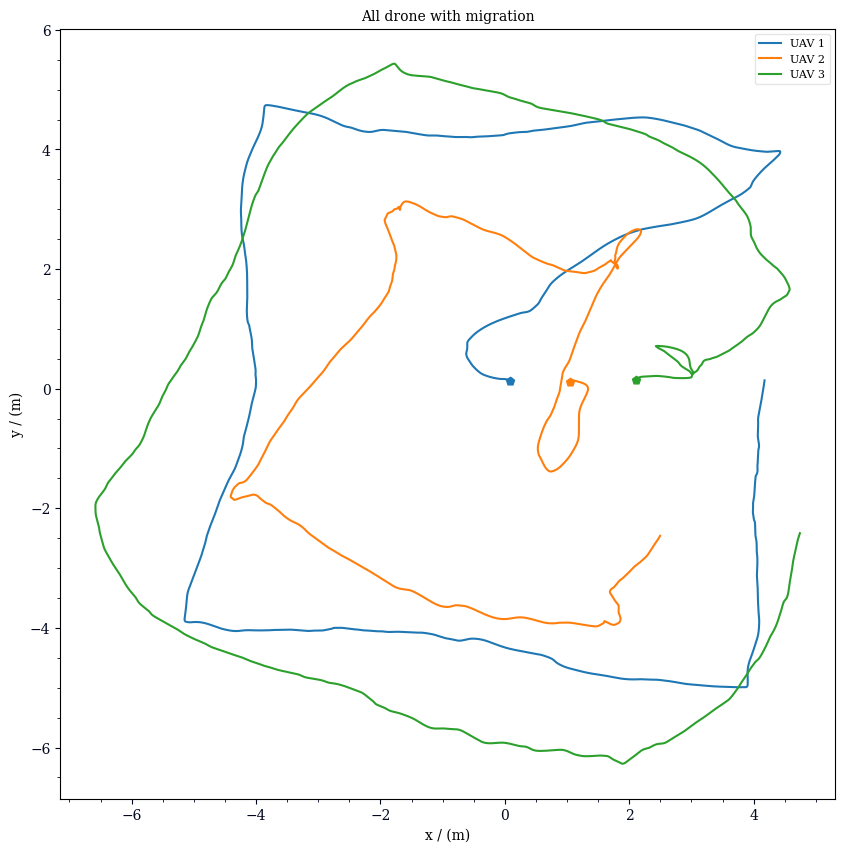

In [168]:
setPlot()
fig,ax = plt.subplots()
for index,pose in enumerate(poses):
    # 绘制起点
    ax.scatter(pose['pose.position.x'].head(1),pose['pose.position.y'].head(1),marker="p")
    ax.plot(pose['pose.position.x'],pose['pose.position.y'],label="UAV {}".format(index + 1) )
    ax.set_label("UAV {}".format(index + 1))

ax.set_xlabel("x / (m)")
ax.set_ylabel("y / (m)")
ax.set_title("All drone with migration")
ax.legend()

plt.savefig(fname=save_path + save_prefix + "_traj_" + time_str,dpi=300)

### estimator error

In [169]:
detection_filter = bag.topic_table['Topics'].str.contains("multi")
bag.topic_table.loc[detection_filter]

,Topics,Types,Message Count,Frequency
59,/drone_1/multi_target_tracking_node/detections,vision_msgs/Detection3DArray,1824,10.0
60,/drone_1/multi_target_tracking_node/num_targets,std_msgs/Int32,1824,10.0
61,/drone_1/multi_target_tracking_node/pose_cov,geometry_msgs/PoseWithCovarianceStamped,1812,10.0
123,/drone_2/multi_target_tracking_node/detections,vision_msgs/Detection3DArray,1821,10.0
124,/drone_2/multi_target_tracking_node/num_targets,std_msgs/Int32,1821,10.0
125,/drone_2/multi_target_tracking_node/pose_cov,geometry_msgs/PoseWithCovarianceStamped,1818,10.0
187,/drone_3/multi_target_tracking_node/detections,vision_msgs/Detection3DArray,1822,10.0
188,/drone_3/multi_target_tracking_node/num_targets,std_msgs/Int32,1822,10.0
189,/drone_3/multi_target_tracking_node/pose_cov,geometry_msgs/PoseWithCovarianceStamped,1694,10.0
205,/gcs/multi_target_tracking_config_server/param...,dynamic_reconfigure/ConfigDescription,1,NaN


In [170]:
detections_files = [bag.message_by_topic("/drone_{}/multi_target_tracking_node/detections".format(i))
                    for i in range(1,num_uav + 1)]
detections = [pd.read_csv(detections_file) for detections_file in detections_files]
detections = [detection.loc[ (detection['Time'] >= START_TIME) & (detection['Time'] <= END_TIME)]
              for detection in detections]
print([detection.shape for detection in detections])

[(1294, 6), (1294, 6), (1294, 6)]


In [171]:
for detection in detections:
    detection['bbox.center.position.x'] = \
        detection['detections'].apply(lambda x: float(x.split('\n')[10].split(":")[-1]) \
                                                         if len(x.split('\n'))>10 else None)
    detection['bbox.center.position.y'] = \
        detection['detections'].apply(lambda x: float(x.split('\n')[11].split(":")[-1]) \
                                                         if len(x.split('\n'))>10 else None)

In [172]:
## add new columns that is distance
for d in detections:
    d['bbox.center.distance'] = np.sqrt( (d['bbox.center.position.x']**2 + d['bbox.center.position.y']**2))
print(detections[0].columns)

Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'detections', 'bbox.center.position.x',
       'bbox.center.position.y', 'bbox.center.distance'],
      dtype='object')


## CMAP

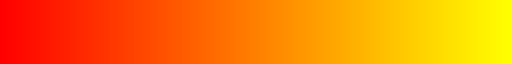

In [173]:
import matplotlib
autumn = matplotlib.colormaps.get_cmap('autumn')
autumn

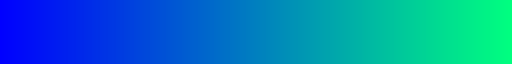

In [174]:
winter = matplotlib.colormaps.get_cmap('winter')
winter

### 无人机1 绘制内容
- 无人机2 相对于 无人机1 位置
- 无人机3 相对于 无人机1 位置

In [175]:
# poses 为所有无人机的 vision_pose/pose
print(poses[0].columns.values)
relative_poses = pd.DataFrame()
relative_poses['Time'] = poses[0]['Time']

['Time' 'header.seq' 'header.stamp.secs' 'header.stamp.nsecs'
 'header.frame_id' 'pose.position.x' 'pose.position.y' 'pose.position.z'
 'pose.orientation.x' 'pose.orientation.y' 'pose.orientation.z'
 'pose.orientation.w']


In [176]:
for uav in range(1,num_uav + 1):
    # iterate other uav
    for other in list(range(1,uav)) + list(range(uav + 1,num_uav + 1)):
        relative_poses["uav{}_to_{}_pose.x".format(other,uav)] = poses[other - 1]['pose.position.x'] - poses[uav -1]['pose.position.x']
        relative_poses["uav{}_to_{}_pose.y".format(other,uav)] = poses[other - 1]['pose.position.y'] - poses[uav - 1]['pose.position.y']
        nx = "uav{}_to_{}_pose.x".format(other,uav)
        ny = "uav{}_to_{}_pose.y".format(other,uav)
        relative_poses["uav{}_to_{}_distance".format(other,uav)] = np.sqrt( (relative_poses[nx]**2 + relative_poses[ny]**2) )
print(relative_poses.columns)
    

Index(['Time', 'uav2_to_1_pose.x', 'uav2_to_1_pose.y', 'uav2_to_1_distance',
       'uav3_to_1_pose.x', 'uav3_to_1_pose.y', 'uav3_to_1_distance',
       'uav1_to_2_pose.x', 'uav1_to_2_pose.y', 'uav1_to_2_distance',
       'uav3_to_2_pose.x', 'uav3_to_2_pose.y', 'uav3_to_2_distance',
       'uav1_to_3_pose.x', 'uav1_to_3_pose.y', 'uav1_to_3_distance',
       'uav2_to_3_pose.x', 'uav2_to_3_pose.y', 'uav2_to_3_distance'],
      dtype='object')


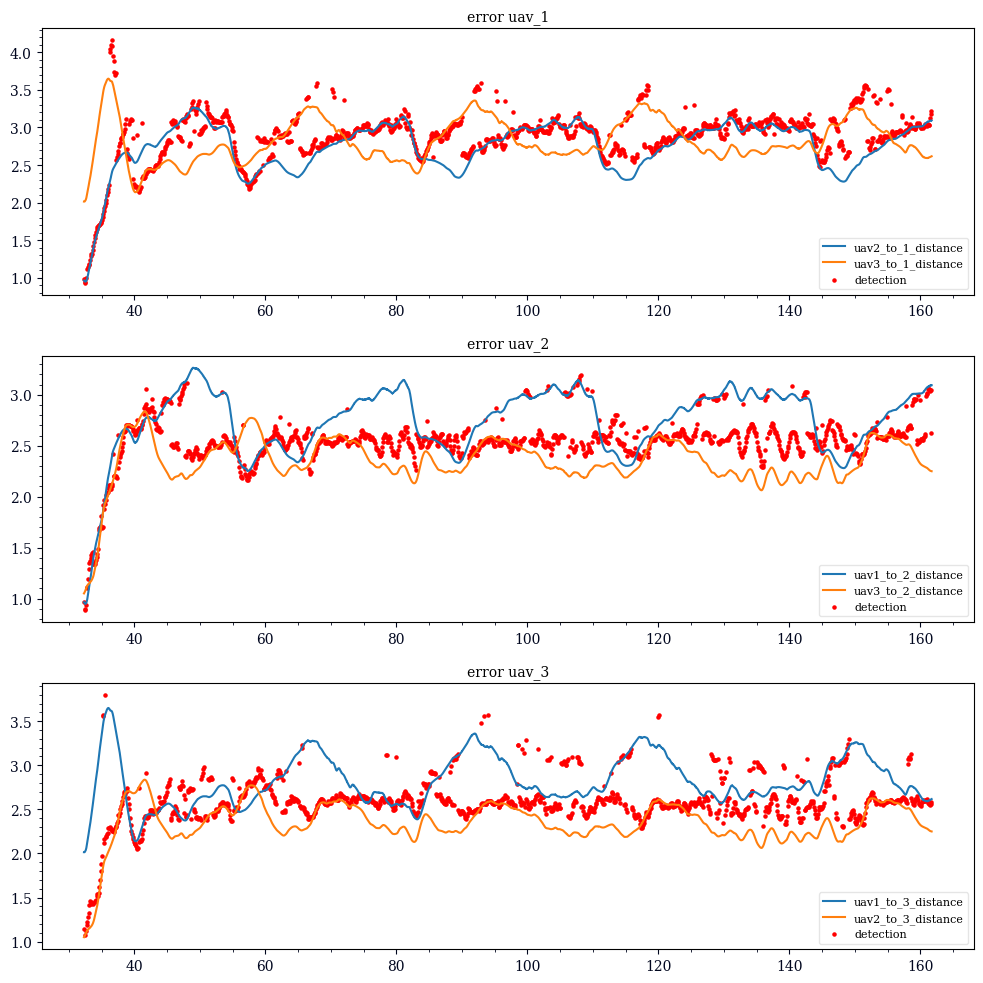

In [177]:
fig,axes = plt.subplots(3,1)
for index,ax in enumerate(axes):
    ax:plt.Axes
    ax.set_title("error uav_{}".format(index + 1))
    # 相对位置
    for other in list(range(0,index)) + list(range(index+1, num_uav)):
        # 真实位置
        ax.plot(relative_poses['Time'], \
                relative_poses['uav{}_to_{}_distance'.format(other + 1,index+1)], \
                label='uav{}_to_{}_distance'.format(other + 1,index+1))
    ax.scatter(detections[index]['Time'], \
            detections[index]['bbox.center.distance'],s=5,c="r",label="detection")
    ax.legend()

plt.tight_layout()

### notion
- detection 与 真实位置之间存在坐标转换

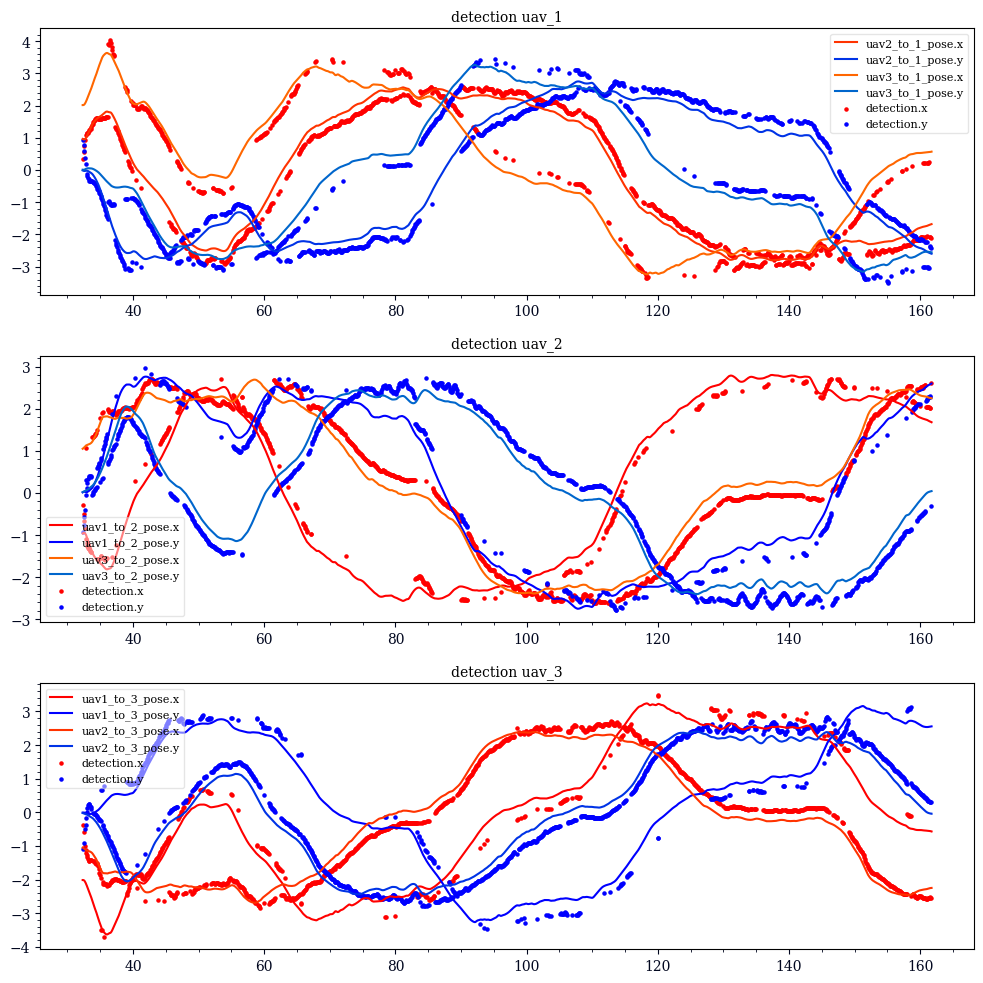

In [178]:

fig,axes = plt.subplots(3,1)
for index,ax in enumerate(axes):
    ax:plt.Axes
    ax.set_title("detection uav_{}".format(index + 1))
    # 相对位置
    for other in list(range(0,index)) + list(range(index+1, num_uav)):
        # 真实位置
        ax.plot(relative_poses['Time'], \
                relative_poses['uav{}_to_{}_pose.x'.format(other + 1,index+1)], \
                label='uav{}_to_{}_pose.x'.format(other + 1,index+1),
                color = autumn(0.2 * other))
        
        ax.plot(relative_poses['Time'], \
                relative_poses['uav{}_to_{}_pose.y'.format(other + 1,index+1)], \
                label='uav{}_to_{}_pose.y'.format(other + 1,index+1),
                color = winter(0.2 * other ))
        
    ax.scatter(detections[index]['Time'], \
            -detections[index]['bbox.center.position.y'],s=5,c="r",label="detection.x")
    ax.scatter(detections[index]['Time'], \
            detections[index]['bbox.center.position.x'],s=5,c="b",label="detection.y")
    ax.legend()

plt.tight_layout()
plt.savefig(fname=save_path + save_prefix + '_detection_' + time_str, dpi=300)

### CMAP

(1.0, 0.09803921568627451, 0.0, 1.0)